Question 1:
There does not appear to be a relationship regarding wages and age. 
The plots are so scattered that it seems age and wage do not relate as much. 
However, there are a few cases where those who make 250+ are between the 
ages of 30 and 70.



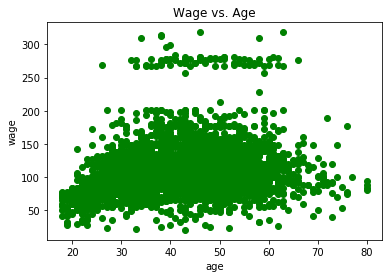

In [17]:
#####
# 1 # - Create a scatter plot comparing wage to age
#####

import pandas, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pandas.read_csv('Wage.csv')

X = data['age'][:,None]
y = data['wage'][:,None]
plt.title("Wage vs. Age")

plt.scatter(X, y, c='green')
plt.xlabel("age")
plt.ylabel("wage")

print('''Question 1:
There does not appear to be a relationship regarding wages and age. 
The plots are so scattered that it seems age and wage do not relate as much. 
However, there are a few cases where those who make 250+ are between the 
ages of 30 and 70.
''')

Question 2:
Coefficient(s): [[0.72497502]] 

20% of the data has been set aside. In this case,
the total size of our data is 3000; 20% has been split
for the training set (n=2400) and the testing set (n=600).


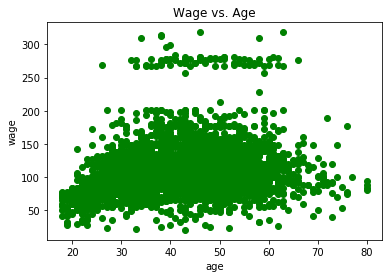

In [23]:
#####
# 2 # - Set aside 20% of the data as a test set (20% of 3000 is 600)
#####

import pandas, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pandas.read_csv('Wage.csv')

X = data['age'][:,None]
y = data['wage'][:,None]

plt.scatter(X, y, c='green')
plt.xlabel("age")
plt.ylabel("wage")
plt.title("Wage vs. Age")

# Split the training data of age and wage by 20% for the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print for debugging
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

# Set the linear regression function
reg = LinearRegression()

# Train the model
reg.fit(X_train, y_train)

# Coefficient(s)
print("Question 2:\nCoefficient(s):", reg.coef_, "\n")
print('''20% of the data has been set aside. In this case,
the total size of our data is 3000; 20% has been split
for the training set (n=2400) and the testing set (n=600).''')

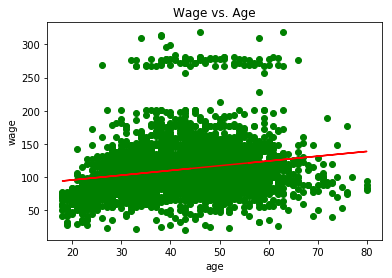

In [73]:
#####
# 3 # - Fit wage as a function of age, list coefficients of model, plot line to scatterplot
#####

import pandas, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pandas.read_csv('Wage.csv')

X = data['age'][:,None]
y = data['wage'][:,None]

plt.scatter(X, y, c='green')
plt.xlabel("age")
plt.ylabel("wage")
plt.title("Wage vs. Age")

# Split the training data of age and wage by 20% for the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set the linear regression function
reg = LinearRegression()

# Train the model
reg.fit(X_train, y_train)

# Predict the value
y_pred = reg.predict(X_test)

# Plot line against the scatterplot from question 1
plt.plot(X_test, y_pred, color='r')

R^2 score: 0.0456048793523397
Based on our low level of correlation on our R^2 score,
this regression model is not a suitable fit.


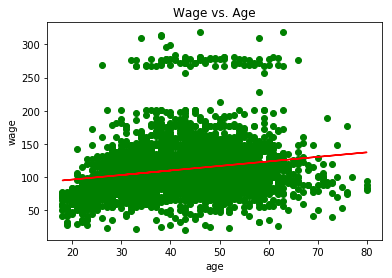

In [56]:
##### - Predict wages for each items in test set then score them against targets
# 4 # - What does R^2 tell about how well the model fits the data?
#####

import pandas, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pandas.read_csv('Wage.csv')

X = data['age'][:,None]
y = data['wage'][:,None]

plt.scatter(X, y, c='green')
plt.xlabel("age")
plt.ylabel("wage")
plt.title("Wage vs. Age")

# Split the training data of age and wage by 20% for the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set the linear regression function
reg = LinearRegression()

# Train the model
reg.fit(X_train, y_train)

# Predict the value
y_pred = reg.predict(X_test)
print("R^2 score:", r2_score(y_test, y_pred))
print('''Based on our low level of correlation on our R^2 score,
this regression model is not a suitable fit.''')

# Plot line against the scatterplot from question 1
plt.plot(X_test, y_pred, color='r')

R^2 score: 0.08437903799977109
The R^2 score of the polynomial compared to the
score of the linear regression model is higher, allowing
more correlation with the data.


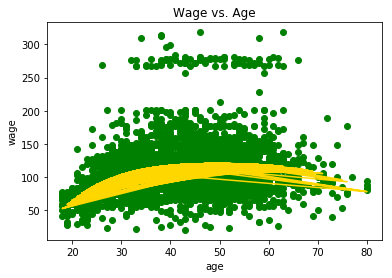

In [72]:
#####
# 5 # - Plot a 4th order polynomial and compare this R^2 to the previous model
#####

import pandas, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

data = pandas.read_csv('Wage.csv')

X = data['age'][:,None]
y = data['wage'][:,None]

plt.scatter(X, y, c='green')
plt.xlabel("age")
plt.ylabel("wage")
plt.title("Wage vs. Age")

# Split the training data of age and wage by 20% for the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set the linear regression function
reg = LinearRegression()

# Set the 4th order polynomial function
polynomial = PolynomialFeatures(degree=4)

# Create a model for the 4th order polynomial and linear regression
model = make_pipeline(polynomial, reg)

# Train the model
model.fit(X_train, y_train)

# Predict the value
y_pred = model.predict(X_test)

# ???
plt.plot(X_test, y_pred, color='gold')

# Predict the value
print("R^2 score:", r2_score(y_test, y_pred))
print('''The R^2 score of the polynomial compared to the
score of the linear regression model is higher, allowing
more correlation with the data.''')

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.793335e-17
  overwrite_a=True).T


R^2 score: 0.11293870464359079
The R^2 score of the polynomial compared to the
score of the linear regression model is higher, allowing
more correlation with the data.


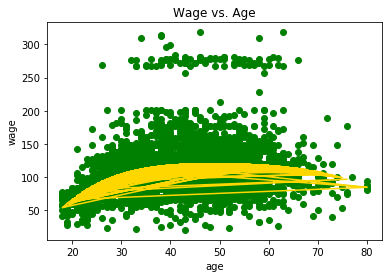

In [68]:
##### - Add L2 regularization with alpha = 0.1 to fit 4th order polynomial
# 6 # - How do the coefficients compare in experiment (4)? How about R^2?
#####

import pandas, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

data = pandas.read_csv('Wage.csv')

X = data['age'][:,None]
y = data['wage'][:,None]

plt.scatter(X, y, c='green')
plt.xlabel("age")
plt.ylabel("wage")
plt.title("Wage vs. Age")

# Split the training data of age and wage by 20% for the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set the 4th order polynomial function
polynomial = PolynomialFeatures(degree=4)

# Create a model for the 4th order polynomial and linear regression
model = make_pipeline(polynomial, Ridge())

# Train the model
model.fit(X_train, y_train)

# Predict the value
y_pred = model.predict(X_test)

# ???
plt.plot(X_test, y_pred, color='gold')

# ???
print("R^2 score:", r2_score(y_test, y_pred))
print('''The R^2 score of the polynomial compared to the
score of the linear regression model is higher, allowing
more correlation with the data.''')